In [1]:
include("../../HamiltonODE.jt")
using Plots
pyplot();
using LaTeXStrings

Finished loading HamiltonSystem
Finished loading HamiltonSteps
Finished loading HamiltonIntegrator
Finished loading HamiltonPlot
Finished loading HamiltonODE


In [2]:
d = 2
m = (1)
q0 = [1.,0.]
p0 = [0.,1.]

F(q)= -q
U(q)= q⋅q
sol(q)=[cos(q),sin(q)]

HS = HamiltonSystem(d,m,q0,p0,F,U,sol);

In [3]:
T=2*2*pi
dts = [1*2.0^-i for i in 1:12];

ConvArgs = [:xaxis => :log, :yaxis => :log, :style => [:dash :solid]];

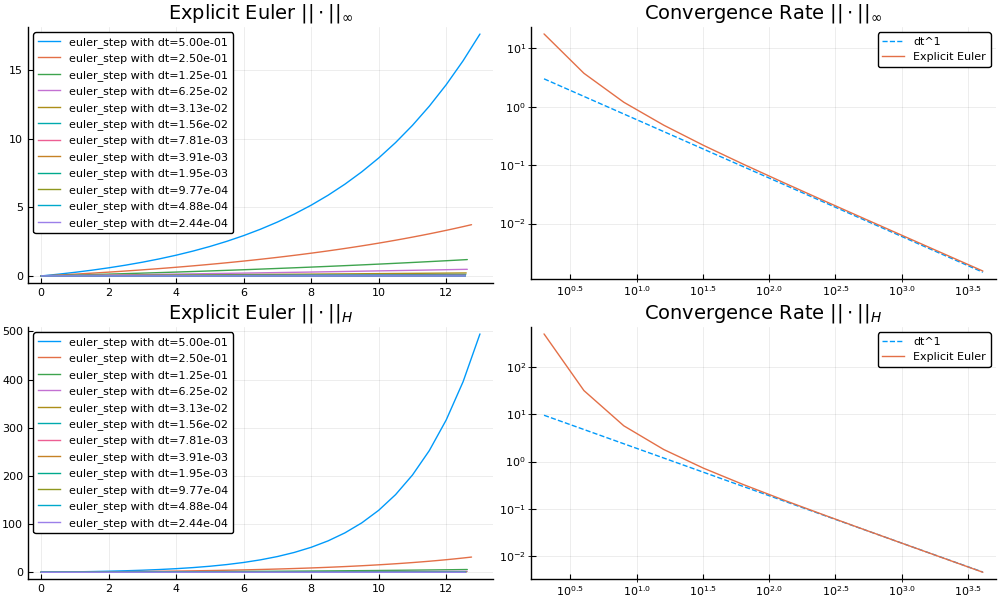

In [4]:
Is = [Integrator(euler_step,dt,T) for dt in dts];
ts,Qs,Ps = integrate(HS,Is);
names = getNames(Is)
EulerEnergyErrors = getEnergyErrors(HS,Qs,Ps)
EulerMaximumErrors = getMaximumErrors(HS,ts,Qs)
p1 = plot(ts,EulerMaximumErrors,label=hcat(names...),title=L"Explicit Euler $||\cdot||_\infty$")
p2 = plot(1 ./ dts,[6*dts,[EulerMaximumErrors[i][end] for i in 1:length(dts)]],
    label=["dt^1" "Explicit Euler"], title=L"Convergence Rate $||\cdot||_\infty$";ConvArgs...)
p3 = plot(ts,EulerEnergyErrors,label=hcat(names...),title=L"Explicit Euler $||\cdot||_H$")
p4 = plot(1 ./ dts,[19*dts,[EulerEnergyErrors[i][end] for i in 1:length(dts)]],
    label=["dt^1" "Explicit Euler"], title=L"Convergence Rate $||\cdot||_H$";ConvArgs...)
plot(p1,p2,p3,p4,size=(1000,600))

Integrating using i_euler_step dt = 0.000244140625...100% Time: 0:00:00


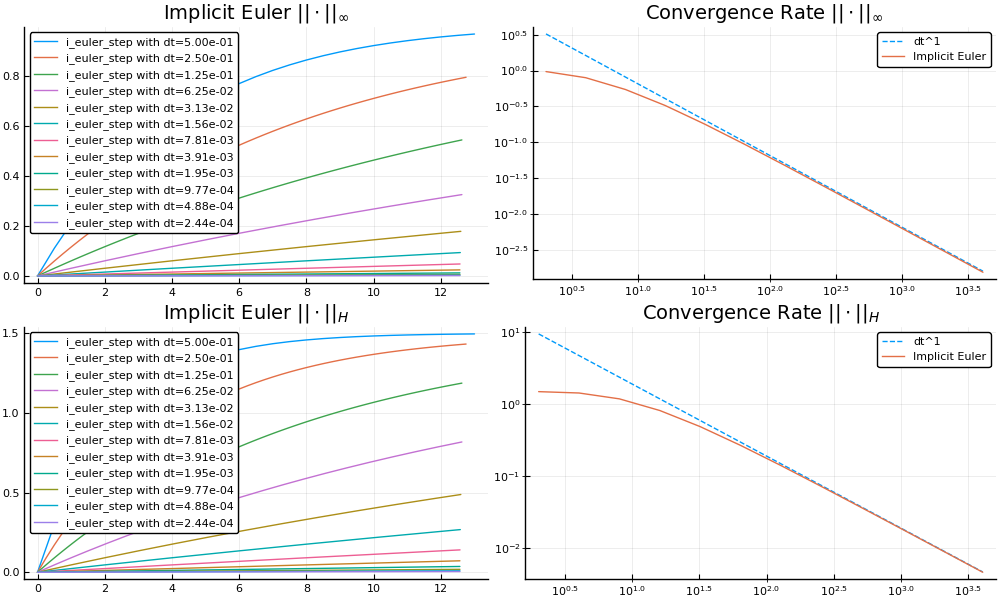

In [5]:
Is = [Integrator(i_euler_step,dt,T) for dt in dts];
ts,Qs,Ps = integrate(HS,Is);
names = getNames(Is)
IEulerEnergyErrors = getEnergyErrors(HS,Qs,Ps)
IEulerMaximumErrors = getMaximumErrors(HS,ts,Qs);
p1 = plot(ts,IEulerMaximumErrors,label=hcat(names...),title=L"Implicit Euler $||\cdot||_\infty$")
p2 = plot(1 ./ dts,[6.5*dts,[IEulerMaximumErrors[i][end] for i in 1:length(dts)]],
    label=["dt^1" "Implicit Euler"], title=L"Convergence Rate $||\cdot||_\infty$";ConvArgs...)
p3 = plot(ts,IEulerEnergyErrors,label=hcat(names...),title=L"Implicit Euler $||\cdot||_H$")
p4 = plot(1 ./ dts,[19*dts, [IEulerEnergyErrors[i][end] for i in 1:length(dts)]],
    label=["dt^1" "Implicit Euler" ], title=L"Convergence Rate $||\cdot||_H$";ConvArgs...)
plot(p1,p2,p3,p4,size=(1000,600))

Integrating using theta_step dt = 0.00048828125...100%|█| Time: 0:00:00
Integrating using theta_step dt = 0.000244140625...100% Time: 0:00:01


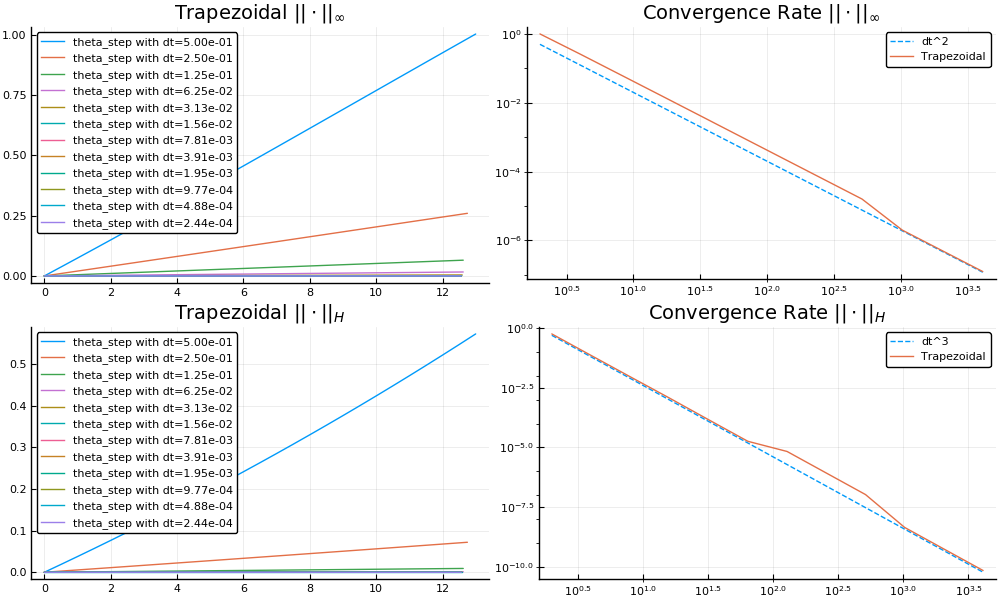

In [6]:
Is = [Integrator(theta_step,dt,T,theta=0.5) for dt in dts];
ts,Qs,Ps = integrate(HS,Is);
names = getNames(Is)
TrapezEnergyErrors = getEnergyErrors(HS,Qs,Ps)
TrapezMaximumErrors = getMaximumErrors(HS,ts,Qs);
p1 = plot(ts,TrapezMaximumErrors,label=hcat(names...),title=L"Trapezoidal $||\cdot||_\infty$")
p2 = plot(1 ./ dts,[2*dts.^2,[TrapezMaximumErrors[i][end] for i in 1:length(dts)]],
    label=["dt^2" "Trapezoidal"], title=L"Convergence Rate $||\cdot||_\infty$";ConvArgs...)
p3 = plot(ts,TrapezEnergyErrors,label=hcat(names...),title=L"Trapezoidal $||\cdot||_H$")
p4 = plot(1 ./ dts,[4*dts.^3, [TrapezEnergyErrors[i][end] for i in 1:length(dts)]],
    label=["dt^3" "Trapezoidal" ], title=L"Convergence Rate $||\cdot||_H$";ConvArgs...)
plot(p1,p2,p3,p4,size=(1000,600))

Integrating using verlet_step dt = 0.000244140625...100% Time: 0:00:00


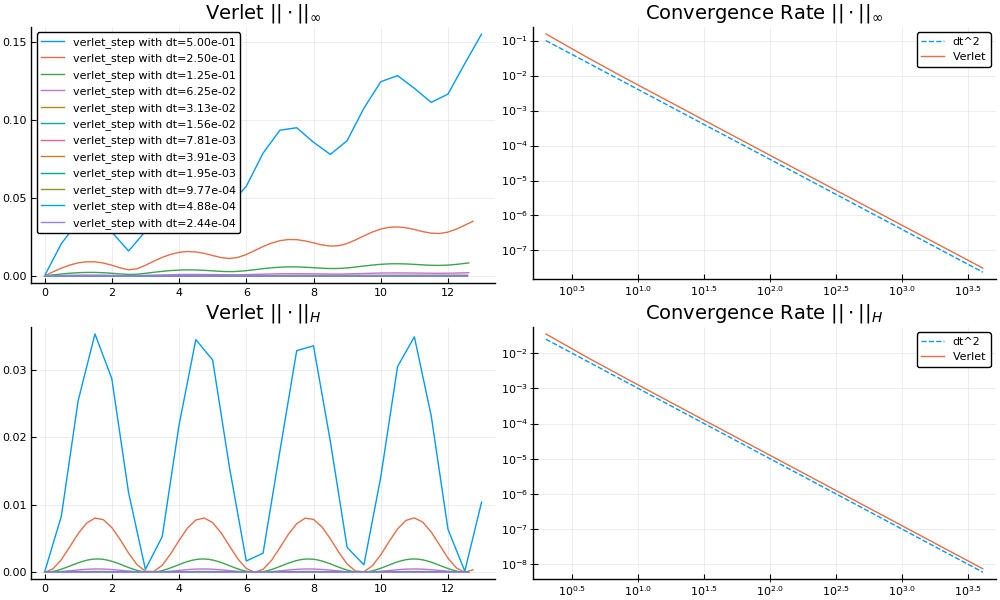

In [7]:
Is = [Integrator(verlet_step,dt,T) for dt in dts];
ts,Qs,Ps = integrate(HS,Is);
names = getNames(Is)
VerletEnergyErrors = getEnergyErrors(HS,Qs,Ps)
VerletMaximumErrors = getMaximumErrors(HS,ts,Qs);
p1 = plot(ts,VerletMaximumErrors,label=hcat(names...),title=L"Verlet $||\cdot||_\infty$")
p2 = plot(1 ./ dts,[0.4*dts.^2,[max(VerletMaximumErrors[i]...) for i in 1:length(dts)]],
    label=["dt^2" "Verlet"], title=L"Convergence Rate $||\cdot||_\infty$";ConvArgs...)
p3 = plot(ts,VerletEnergyErrors,label="",title=L"Verlet $||\cdot||_H$")
p4 = plot(1 ./ dts,[0.1*dts.^2, [max(VerletEnergyErrors[i]...) for i in 1:length(dts)]],
    label=["dt^2" "Verlet" ], title=L"Convergence Rate $||\cdot||_H$";ConvArgs...)
plot(p1,p2,p3,p4,size=(1000,600))

Integrating using rk4_step dt = 0.0009765625...100%|████| Time: 0:00:00
Integrating using rk4_step dt = 0.00048828125...100%|███| Time: 0:00:00
Integrating using rk4_step dt = 0.000244140625...100%|██| Time: 0:00:01


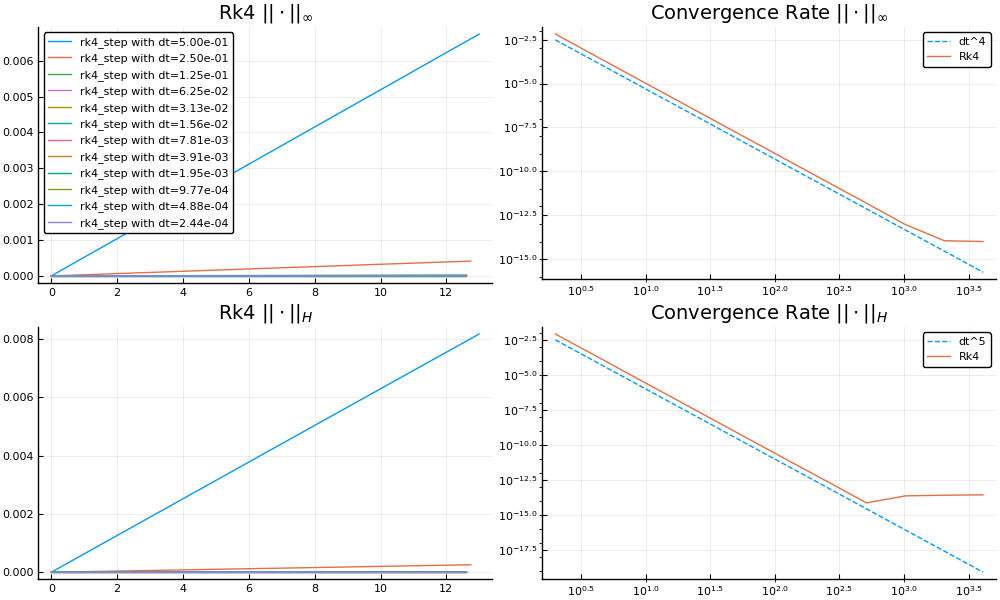

In [8]:
Is = [Integrator(rk4_step,dt,T) for dt in dts];
ts,Qs,Ps = integrate(HS,Is);
names = getNames(Is)
Rk4EnergyErrors = getEnergyErrors(HS,Qs,Ps)
Rk4MaximumErrors = getMaximumErrors(HS,ts,Qs);
p1 = plot(ts,Rk4MaximumErrors,label=hcat(names...),title=L"Rk4 $||\cdot||_\infty$")
p2 = plot(1 ./ dts,[0.05*dts.^4,[max(Rk4MaximumErrors[i]...) for i in 1:length(dts)]],
    label=["dt^4" "Rk4"], title=L"Convergence Rate $||\cdot||_\infty$";ConvArgs...)
p3 = plot(ts,Rk4EnergyErrors,label="",title=L"Rk4 $||\cdot||_H$")
p4 = plot(1 ./ dts,[0.1*dts.^5, [max(Rk4EnergyErrors[i]...) for i in 1:length(dts)]],
    label=["dt^5" "Rk4" ], title=L"Convergence Rate $||\cdot||_H$";ConvArgs...)
plot(p1,p2,p3,p4,size=(1000,600))

Integrating using projected_step dt = 0.0009765625...100% Time: 0:00:00
Integrating using projected_step dt = 0.00048828125...100% Time: 0:00:00
Integrating using projected_step dt = 0.000244140625...100% Time: 0:00:01


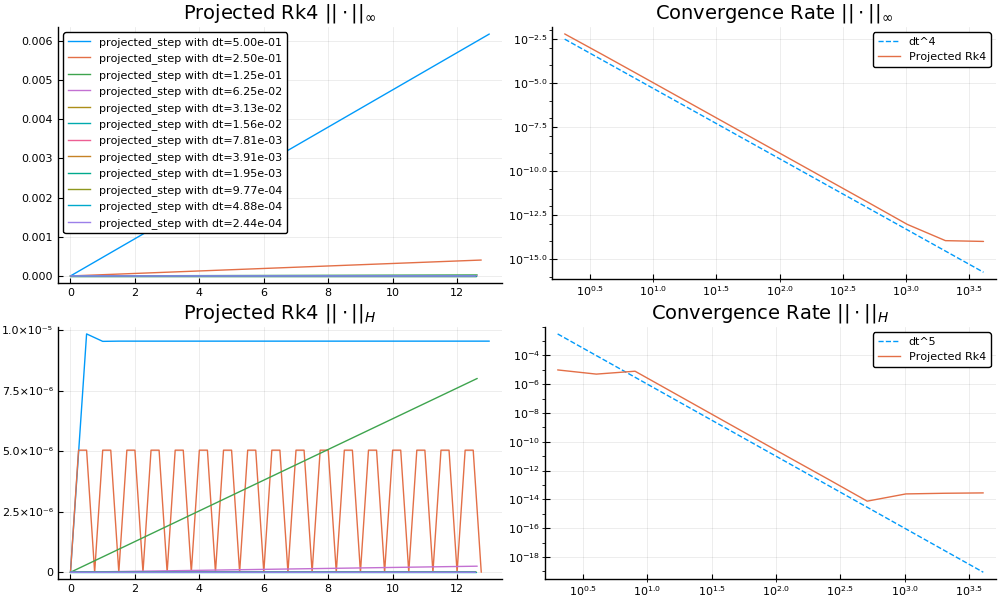

In [9]:
Is = [Integrator(projected_step,dt,T) for dt in dts];
ts,Qs,Ps = integrate(HS,Is);
names = getNames(Is)
PRk4EnergyErrors = getEnergyErrors(HS,Qs,Ps)
PRk4MaximumErrors = getMaximumErrors(HS,ts,Qs);
p1 = plot(ts,PRk4MaximumErrors,label=hcat(names...),title=L"Projected Rk4 $||\cdot||_\infty$")
p2 = plot(1 ./ dts,[0.05*dts.^4,[max(PRk4MaximumErrors[i]...) for i in 1:length(dts)]],
    label=["dt^4" "Projected Rk4"], title=L"Convergence Rate $||\cdot||_\infty$";ConvArgs...)
p3 = plot(ts,PRk4EnergyErrors,label="",title=L"Projected Rk4 $||\cdot||_H$")
p4 = plot(1 ./ dts,[0.1*dts.^5, [max(PRk4EnergyErrors[i]...) for i in 1:length(dts)]],
    label=["dt^5" "Projected Rk4" ], title=L"Convergence Rate $||\cdot||_H$";ConvArgs...)
plot(p1,p2,p3,p4,size=(1000,600))